<a href="https://colab.research.google.com/github/RogerUltimate/-Keras-study/blob/main/5_2_Code_%EB%92%B7%EB%B6%80%EB%B6%84_%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


5-2 실습코드 링크
https://github.com/rickiepark/deep-learning-with-python-notebooks/blob/tf2/5.2-using-convnets-with-small-datasets.ipynb


데이터셋 마운트 참고 블로그 https://soohee410.github.io/colab_kaggle

In [ ]:
# 이 실습링크에서 적용한 방식
# 1. kagle 에서 kagle.json 파일 받기
# 2. colab에 json 파일 올리기
# 3. kagle 에서 데이터셋 링크를 가져오기
# 4. colab에서 마운트된 데이터의 경로를 지정하여 압축해제

데이터 세팅

In [ ]:
# kagle에서 다운받은 kagle.json 파일 colab에 업로드

# from google.colab import files
# files.upload()

In [ ]:
# ls -lha kaggle.json

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle.kaggel.json
# # chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# kagle에서 데이터셋을 구글드라이브로 다운로드

# !kaggle competitions download -c dogs-vs-cats

In [ ]:
# !ls

In [ ]:
# 구글드라이브를 colab에 연동

# import os  
# from google.colab import drive  
# drive.mount('/content/gdrive')  

In [ ]:
# 파일이 있는 경로 지정

# cd /content/gdrive/My Drive/keras study/5-2

In [ ]:
# 파일 압축 풀기 - 여기서는 dogs-vs-cats.zip 안에 train.zip 과 test1.zip이 있어 총 언집 3번

# !unzip dogs-vs-cats.zip 
# !unzip train.zip 
# !unzip test1.zip 

In [ ]:
# import keras
from tensorflow import keras
keras.__version__

'2.5.0'

In [ ]:
import os, shutil
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
original_dataset_dir = '/gdrive/My Drive/keras study/5-2/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/gdrive/My Drive/keras study/5-2/cats_and_dogs_small4'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

In [ ]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
# os.path.join() : 파일명과 경로를 합치기
# path = "C:/User/Desktop/test"
# filename = "test.txt"
# os.path.join(path, filename)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
# src라는 이름의 파일을 dst로 복사 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)    

In [ ]:
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)    

In [ ]:
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


네트워크 구성

In [ ]:
# from keras import layers
# from keras import models
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# from keras import optimizers
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# error
# /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
#   "The `lr` argument is deprecated, use `learning_rate` instead.")

데이터 전처리

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [ ]:
# history = model.fit_generator(
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 43s 116ms/step - loss: 0.6909 - acc: 0.5195 - val_loss: 0.6770 - val_acc: 0.5300
Epoch 2/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6624 - acc: 0.6020 - val_loss: 0.6804 - val_acc: 0.5640
Epoch 3/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6313 - acc: 0.6425 - val_loss: 0.6277 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5839 - acc: 0.6940 - val_loss: 0.5892 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5495 - acc: 0.7305 - val_loss: 0.5917 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5168 - acc: 0.7395 - val_loss: 0.6311 - val_acc: 0.6420
Epoch 7/30
100/100 [==============================] - 12s 115ms/step - loss: 0.4887 - acc: 0.7565 - val_loss: 0.6049 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_111.h5')

In [ ]:
import matplotlib.pyplot as plt

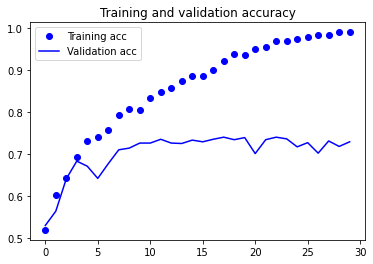

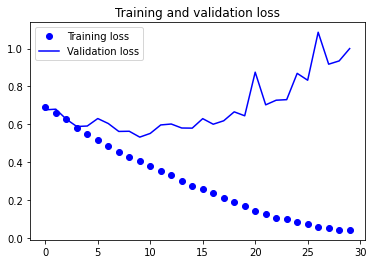

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

데이터 증식 사용하기

In [ ]:
datagen = ImageDataGenerator(
      # 지정 각도 범위 내에서 원본이미지 회전 0~40도
      rotation_range=40,
      # 수평방향 범위 이동 - 여기선 전체에 20% 정도 범위
      width_shift_range=0.2,
      # 수직방향 범위 이동 - 여기선 전체에 20% 정도 범위
      height_shift_range=0.2,
      # 이미지 뒤틀림. 0.2radian 내외로 시계반대방향으로 변형
      shear_range=0.2,
      # 0.8~ 1.2배 사이의 크기조정
      zoom_range=0.2,
      # 수평방향 뒤집기
      horizontal_flip=True,      
      fill_mode='nearest')

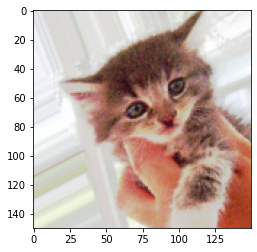

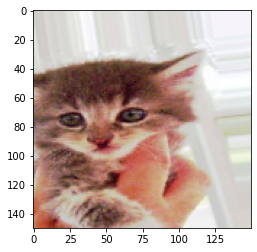

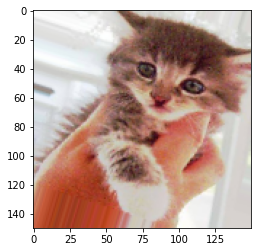

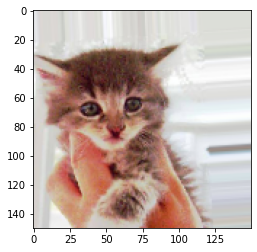

In [ ]:
# 이미지 전처리 유틸리티 모듈
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              # optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        # batch_size=32,
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        # batch_size=32,
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# history = model.fit_generator(
# history = model.fit(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=100,
#       validation_data=validation_generator,
#       validation_steps=50)

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

##error
# Found 2000 images belonging to 2 classes.
# Found 1000 images belonging to 2 classes.
# /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
#   warnings.warn('`Model.fit_generator` is deprecated and '
# Epoch 1/100
#  63/100 [=================>............] - ETA: 9s - loss: 0.6944 - acc: 0.5091WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10000 batches). You may need to use the repeat() function when building your dataset.
# WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.
# 100/100 [==============================] - 22s 198ms/step - loss: 0.6938 - acc: 0.5122 - val_loss: 0.6863 - val_acc: 0.5820

Epoch 1/100
100/100 [==============================] - 21s 199ms/step - loss: 0.6947 - acc: 0.5055 - val_loss: 0.6843 - val_acc: 0.5240
Epoch 2/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6855 - acc: 0.5540 - val_loss: 0.6694 - val_acc: 0.5940
Epoch 3/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6741 - acc: 0.5780 - val_loss: 0.6523 - val_acc: 0.5990
Epoch 4/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6646 - acc: 0.5920 - val_loss: 0.6406 - val_acc: 0.6160
Epoch 5/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6630 - acc: 0.5985 - val_loss: 0.6415 - val_acc: 0.6400
Epoch 6/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6497 - acc: 0.6095 - val_loss: 0.6390 - val_acc: 0.6280
Epoch 7/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6327 - acc: 0.6320 - val_loss: 0.6740 - val_acc: 0.5910
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('cats_and_dogs_small_222.h5')

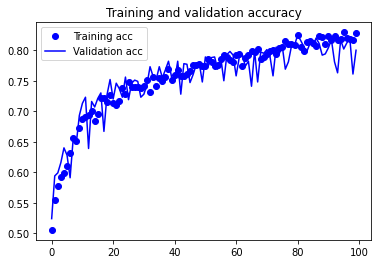

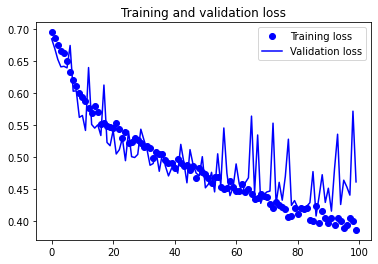

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

실습링크

5-1 https://colab.research.google.com/drive/1aX38SknC5guOQ0SGQwgQ7GafSNFHzxMZ?usp=sharing 


5-2 https://colab.research.google.com/drive/17_fz6neWeaWm2fFV4OcDxsdVu90Csjpp?usp=sharing